In [177]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)

In [178]:
#track_record = pd.read_csv('track_record_count_150_powell_01.csv')
track_record = pd.read_csv('track_record_count_200_powell_01_onlydates_with_bets_between80-20.csv')

#track_record['return2'] = track_record['return'].shift(fill_value=0)-1
#track_record['return2'] = track_record['return'] - 1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return4'] = track_record['return2'].cumsum()

set_inital = pd.DataFrame({'game_id': ["0000000"], "return": [1]})

#track_record = pd.concat([set_inital, track_record]).reset_index(drop=True)
#track_record['stake'] = track_record['return'].shift(fill_value=1)
#track_record['return_shifted'] = track_record['return'].shift(periods=-1)
track_record

,game_id,return,n_bets,datetime
0,2738735,0.481000,25,2019-04-27
1,2738739,0.000000,16,2019-04-27
2,2738740,0.166903,32,2019-04-27
3,2746105,0.000000,12,2019-05-04
4,2746106,0.991063,34,2019-05-04
...,...,...,...,...
108,4396133,0.000000,31,2020-11-29
109,4943795,2.869759,31,2020-12-10
110,4396163,0.562206,23,2020-12-17
111,4396156,0.435873,18,2020-12-17


In [179]:
count_col = track_record.groupby(['datetime']).count().reset_index()['game_id']

In [180]:
track_record = track_record.groupby(['datetime'])[['return', 'n_bets']].sum().reset_index()
track_record['count'] = count_col
#track_record = track_record[track_record.datetime>="2019-10-19"]
track_record

,datetime,return,n_bets,count
0,2019-04-27,0.647904,73,3
1,2019-05-04,0.991063,46,2
2,2019-05-18,1.383479,34,3
3,2019-05-27,1.150419,33,2
4,2019-06-12,0.861673,30,1
5,2019-07-21,0.410102,59,4
6,2019-07-22,1.576417,23,1
7,2019-07-29,1.239984,51,1
8,2019-08-03,1.919953,33,2
9,2019-08-05,2.671035,44,1


In [181]:
print(track_record['return'].corr(track_record['count'], method='kendall'))
print(track_record['return'].corr(track_record['n_bets'],))

0.06534524284205967
0.0025708709476817263


In [171]:
track_record.groupby(['count']).median() # lower count and lower n_bets implies lower returns?

C:\Users\Marcos Augusto\AppData\Local\Temp\ipykernel_11952\2983746942.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  track_record.groupby(['count']).median() # lower count and lower n_bets implies lower returns?


,return,n_bets
count,,
1,0.650482,23.0
2,1.018074,38.5
3,1.225211,61.0
4,0.851569,57.5
5,1.428716,71.0


In [161]:
# stake = [1]
# current_stake = 1
# for i in track_record['return']:
#     current_stake = (current_stake-1) + 1*i
#     stake.append(current_stake)

# stake

In [182]:
stake = [1]
current_stake = 1
percentage = 0.10
for i in track_record['return']:

    preserved_stake = current_stake * (1-percentage)
    bet_stake = current_stake*percentage
    current_stake = preserved_stake + bet_stake*i

    print(current_stake)

    stake.append(current_stake)

0.9647903834787099
0.9639281533937829
1.0008928076462393
1.015948160449781
1.001894887799393
0.9427933526519228
0.9971375339230494
1.0210671916463712
1.1150005932535894
1.3013210753957352
1.1711889678561618
1.172551217733608
1.1315683970062917
1.1800805485962929
1.2014009270553392
1.2391030352557824
1.2568166984594116
1.2631747933602389
1.347175603520934
1.3769207445381004
1.380698352253351
1.4100330521563924
1.5735124468499515
1.5224837519962566
1.370235376796631
1.375451704680773
1.2379065342126958
1.4073702220548887
1.3389897176114611
1.205090745850315
1.1803961382421257
1.214195222755397
1.2452774047913537
1.1916071300933744
1.181921697872493
1.1733122110785503
1.2023212003067614
1.2104514505011608
1.2275909413414945
1.104831847207345
1.127910075724368
1.1454608024032873
1.0309147221629587
0.9278232499466628
0.9756917033153099
0.8781225329837788
0.8982864758377359
0.952789660771227
0.8575106946941042
0.8485095325002721
0.803218342607543
0.7228965083467888
0.7185855241844554
0.64672

In [183]:
my_df = pd.DataFrame({'date': ['0'] + list(track_record.datetime),
                      'return': [0] + list(track_record['return']),
                        'count': [0] + list(count_col),
                      'n_bets': [0] + list(track_record.n_bets),
                      'stake':stake})
my_df


,date,return,count,n_bets,stake
0,0,0.000000,0,0,1.000000
1,2019-04-27,0.647904,3,73,0.964790
2,2019-05-04,0.991063,2,46,0.963928
3,2019-05-18,1.383479,3,34,1.000893
4,2019-05-27,1.150419,2,33,1.015948
5,2019-06-12,0.861673,1,30,1.001895
6,2019-07-21,0.410102,4,59,0.942793
7,2019-07-22,1.576417,1,23,0.997138
8,2019-07-29,1.239984,1,51,1.021067
9,2019-08-03,1.919953,2,33,1.115001


In [186]:
my_df[my_df.stake == my_df.stake.max()]

,date,return,count,n_bets,stake
23,2019-10-21,2.159401,2,29,1.573512


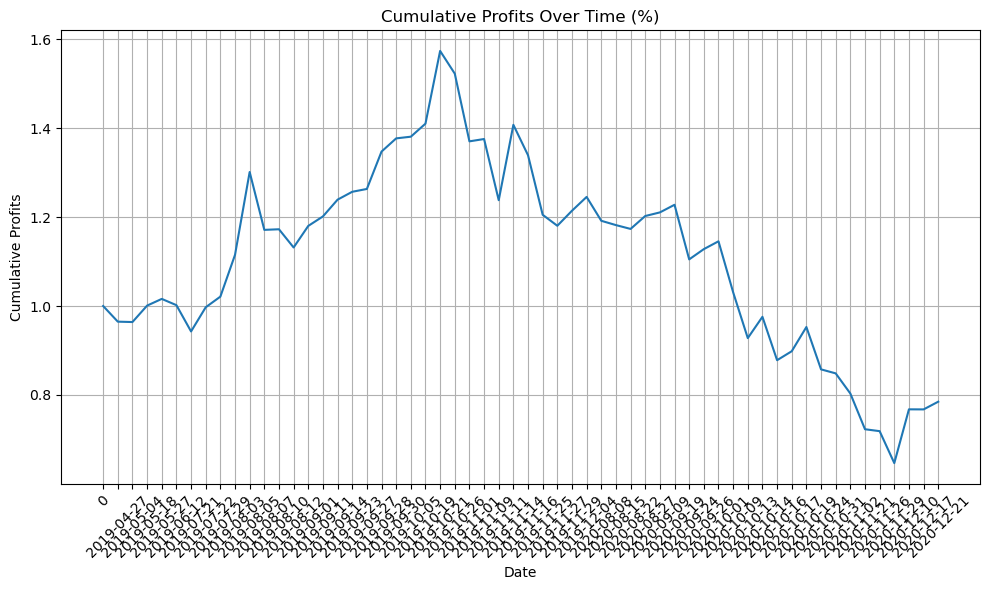

In [187]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(['0'] + list(track_record.datetime), stake, linestyle='-')
plt.title('Cumulative Profits Over Time (%)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

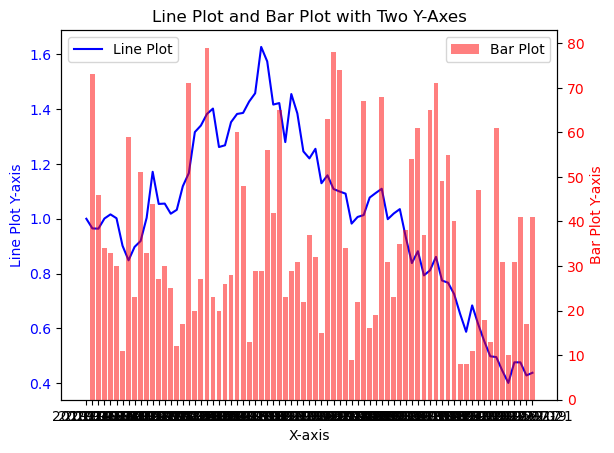

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(1, 11)
line_data = np.random.rand(10) * 10
bar_data = np.random.rand(10) * 20

# Create the figure and axes
fig, ax1 = plt.subplots()

# Create the first y-axis (left)
ax1.plot(['0'] + list(track_record.datetime), stake, color='b', label='Line Plot')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Line Plot Y-axis', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis (right)
ax2 = ax1.twinx()
ax2.bar(['0'] + list(track_record.datetime), [0] + list(track_record.n_bets), alpha=0.5, color='r', label='Bar Plot')
ax2.set_ylabel('Bar Plot Y-axis', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Legend and Title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Line Plot and Bar Plot with Two Y-Axes')
plt.xticks(rotation=45)
# Display or Save the Plot
plt.show()
